# Решающие деревья

Решающие деревья исходно предназначены для решения задач классификации, а также есть их специальные варианты, приспособленные для решения задач регрессии (но это экзотика). Исходно решающие деревья возникли как попытка формализовать тот способ мышления, который используют люди при принятии решений. 

Это хорошо иллюстрируется логикой работы врача, когда он говорит с пациентом и задает один за другим уточняющие вопросы, и буквально за 4–5 вопросов он, имея ответы пациента, либо ставит диагноз, либо дает ему какие-то советы. Но если вообразить себе всю ту информацию, которую использует врач при таких опросах, то это, конечно, не 3–4 пункта, это огромное разветвленное дерево, и каждый ответ пациента отправляет врача в очередную веточку этого дерева. И таким образом, мы имеем, рассматривая диалог врача с пациентом, только один путь от корня дерева к листовой вершине. 

И вот эта аналогия всей информации, которой пользуется врач, как она у него сидит в голове, и тем, как можно было бы автоматически принимать решения, она и приводит к этой конструкции решающих деревьев.

## Задача классификации (обучение с учителем)

Задача восстановления зависимости $y : X \rightarrow Y, |Y| < \infty$ по точкам _обучающей выборки_ $(x_i, y_i),\ i=1,\ldots,l$.

__Дано__: векторы $x_i = (x_i^1, \ldots, x_i^n)$ - объекты обучающей выборки, $y_i = y(x_i)$ - классификации, ответы учителя, $i = 1, \ldots, l$:

$$\begin{pmatrix} x_1^1 & \ldots &x_1^n \\ \ldots & \ldots & \ldots \\ x_l^1 & \ldots & x_l^n \end{pmatrix} \xrightarrow{y} \begin{pmatrix} y_1 \\ \ldots \\ y_l \end{pmatrix}$$

__Найти__: функцию $a(x)$, способную классифицировать объекты произвольной _тестовой выборки_ $\tilde{x_i} = (\tilde{x_i^1}, \ldots, \tilde{x_i^n}),\ i=1, \ldots, k$:

$$\begin{pmatrix} \tilde{x_1^1} & \ldots &\tilde{x_1^n} \\ \ldots & \ldots & \ldots \\ \tilde{x_k^1} & \ldots & \tilde{x_k^n} \end{pmatrix} \xrightarrow{a?} \begin{pmatrix} a(\tilde{x_1}) \\ \ldots \\ a(\tilde{x_k}) \end{pmatrix}$$

Таким образом, наша задача — построить алгоритм классификации, который был бы способен классифицировать новые объекты. Но при этом алгоритм классификации будем строить в виде дерева, то есть в виде какой-то последовательности принимаемых решений.

## Определение бинарного решающего дерева

_Бинарное решающее дерево_ - алгоритм классификации $a(x)$, задающийся бинарным деревом:

1) $\forall v \in V_{\text{внутр}} \rightarrow$ предикат $\beta_v : X \rightarrow\{0, 1\}, \beta_v \in \mathscr{B},$

2) $\forall v \in V_{\text{лист}} \rightarrow$ имя класса $c_v \in Y,$

где $\mathscr{B}$ - множество бинарных признаков или предикатов (например, вида $\beta(x) = [x^j \geq \theta_j], x^j \in \mathbb{R}$).

В бинарном решающем дереве определенная дополнительная информация связана с каждой внутренней вершиной и с каждой листовой. Во внутренней вершине у нас располагается некоторый предикат. Предикат способен, взяв объект, сказать, дальше мы его отправим в левую ветвь или в правую ветвь дерева. В каждой листовой вершине мы будем записывать имя или метку одного из классов, то есть элемент множества $Y$. 

Предикаты, которые будут находиться во внутренних вершинах дерева, мы будем брать из какого-то множества бинарных предикатов. В простейшем случае, если все признаки бинарны — это просто исходные признаки. Например, если признаки вещественные, то будем строить предикаты в виде бинарного условия: значение признака больше или равно, чем некое пороговое значение $\theta$.

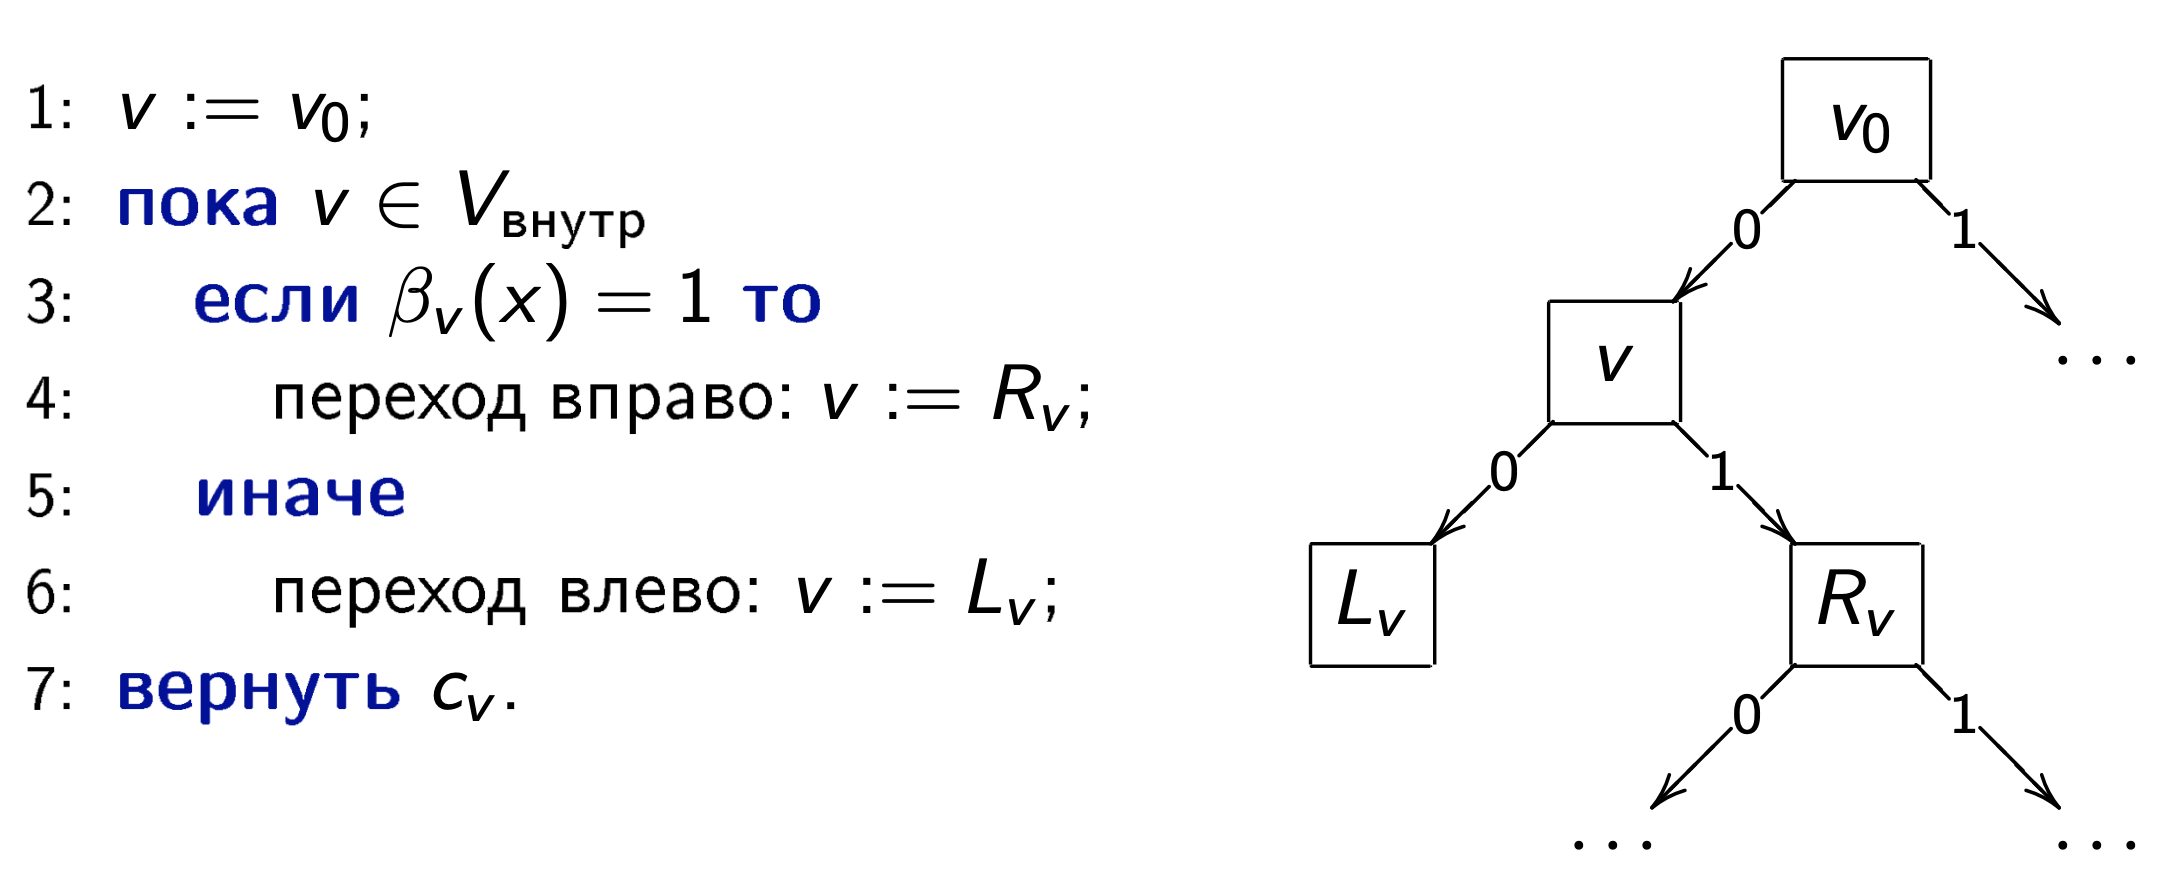

In [37]:
from IPython.display import Image
Image(filename='images/1.3 Решающие деревья/example_1.png')

Принятие решений бинарным решающим деревом выглядит в виде простого алгоритма. Имеется объект $x$ и дерево, начинаем пропускать этот объект через дерево, начиная с корня. И в каждой внутренней вершине проверяем значение предиката на данном объекте. Если это значение равно $1$, то объект переходит в правую дочернюю вершину, а в противном случае он переходит в левую дочернюю вершину. И так происходит до тех пор, пока объект не упрется в какую-то листовую вершину, в которой сидит метка класса, и тогда решающее дерево относит этот объект к этому классу.

## Пример решающего дерева

Задача Фишера о классификации цветков ириса на $3$ класса, в выборке по $50$ объектов каждого класса, $4$ признака.

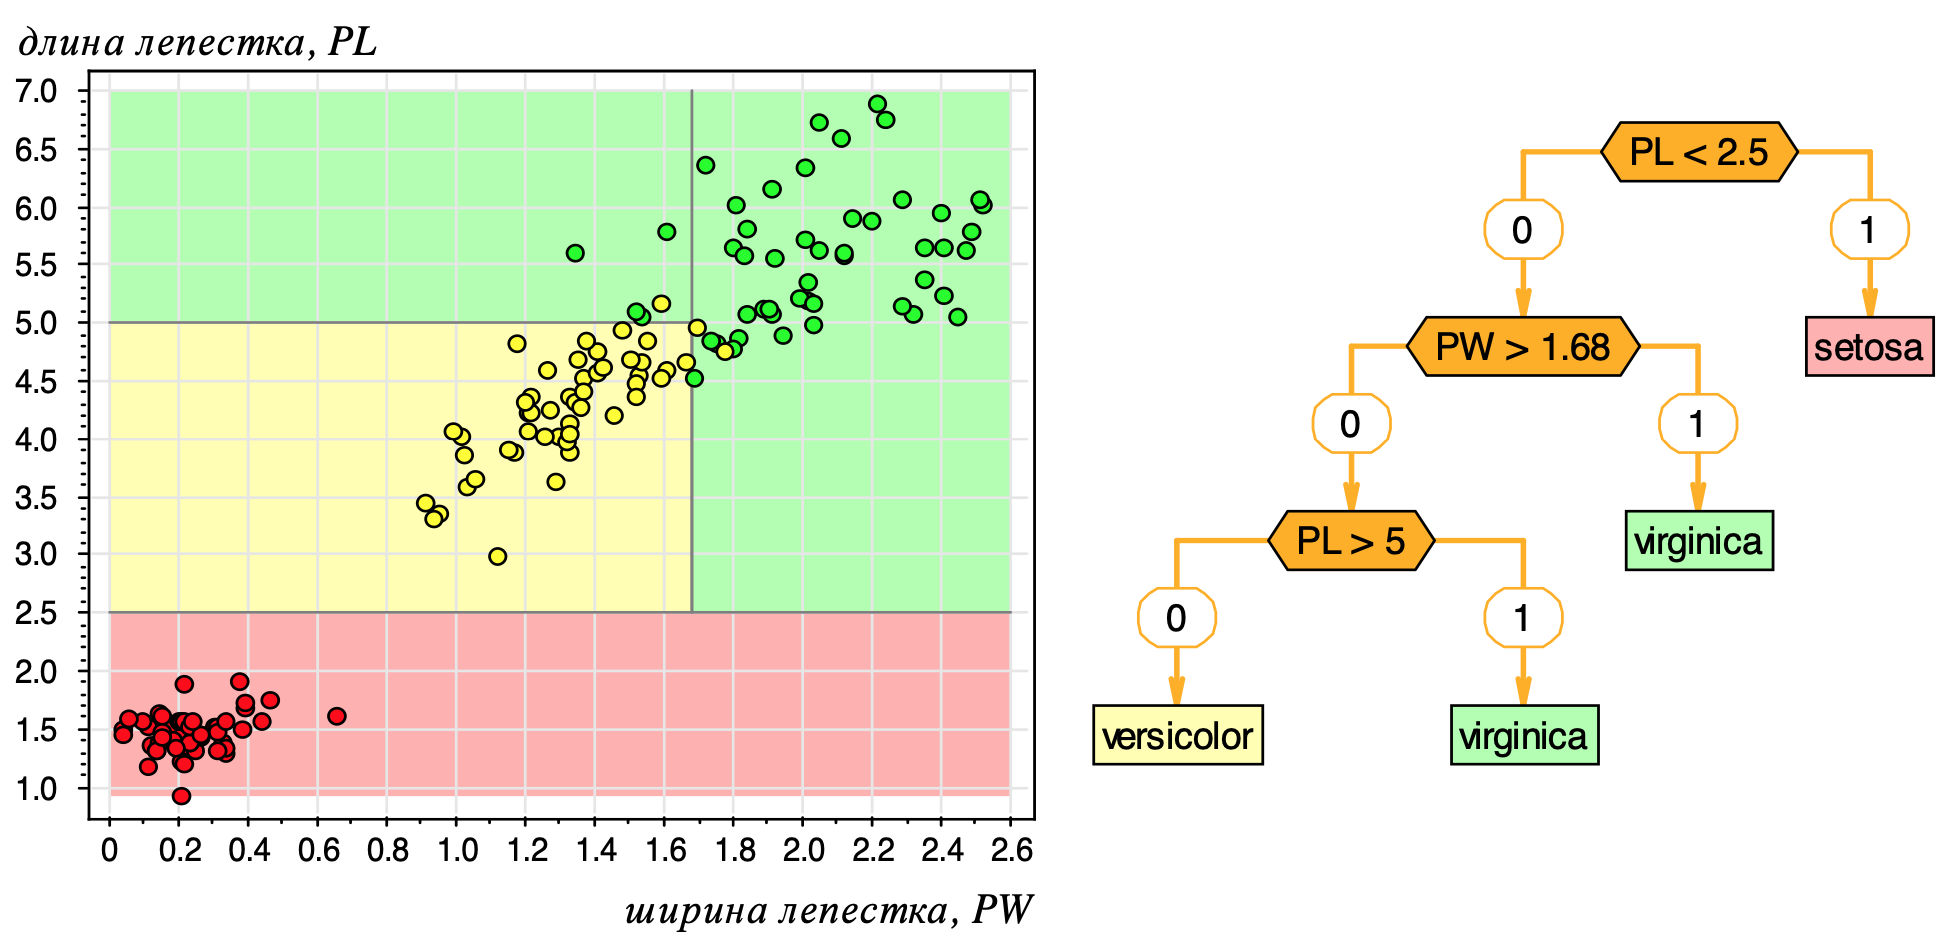

In [2]:
Image(filename='images/1.3 Решающие деревья/example_2.png')

__На графике__: 

в осях двух самых информативных признаков (из $4$) два класса разделились без ошибок, на третьем $3$ ошибки.

## Решающее дерево, покрывающий набор конъюнкций

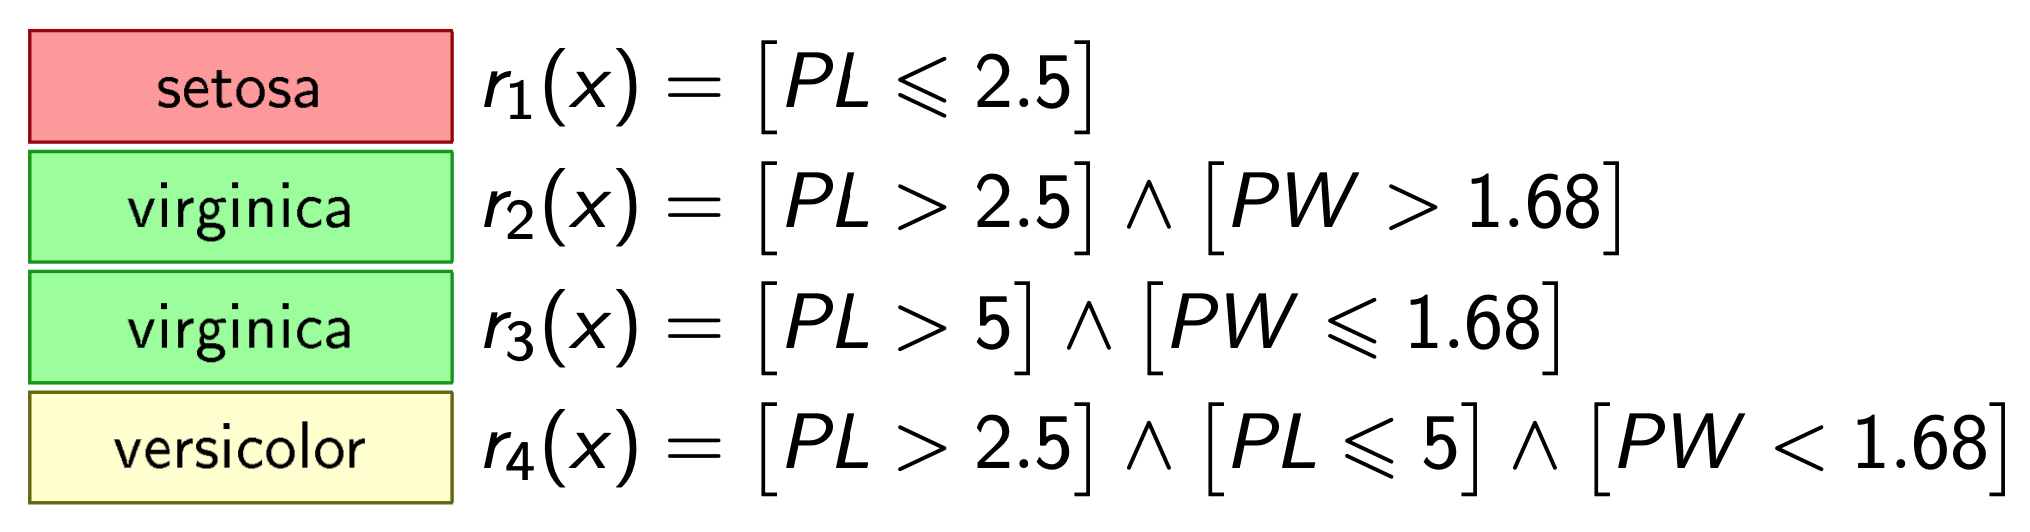

In [3]:
Image(filename='images/1.3 Решающие деревья/example_3.png')

Поскольку дерево нам разделило пространство двух признаков на $4$ куска, мы могли бы отдельно записать условия, которые ограничивают эти $4$ куска, и проверять их по отдельности. И если каждое из этих условий проверить, то одно и только одно из них будет выполнено. Это происходит из-за того, что решающее дерево делит все пространство на непересекающиеся области. 

Такие правила они называются логическими закономерностями, и часто они характеризуются тем, что каждое такое правило выделяет какую-то область в пространстве объектов, в которой находятся объекты либо только одного какого-то класса, либо преимущественно объекты одного класса, как в данном случае получилось с красными точками - одним из видов ириса, который на первом же шаге надежно отделился. 

То есть это еще один способ представлять решающее дерево, мы всегда можем его представить в виде такого покрывающего набора конъюнкций. Почему это конъюнкция? Потому что когда объект спускается от корня дерева к листу, если во всех внутренних вершинах, которые он прошел, взять предикаты, находящиеся в этих внутренних вершинах, и если из них образовать конъюнкцию, то это и будет то самое правило, логическая закономерность, которая доводит этот объект до данной листовой вершины. Это уже готовое правило классификации.

# Алгоритм построения решающего дерева

## Жадный алгоритм построения дерева ID3

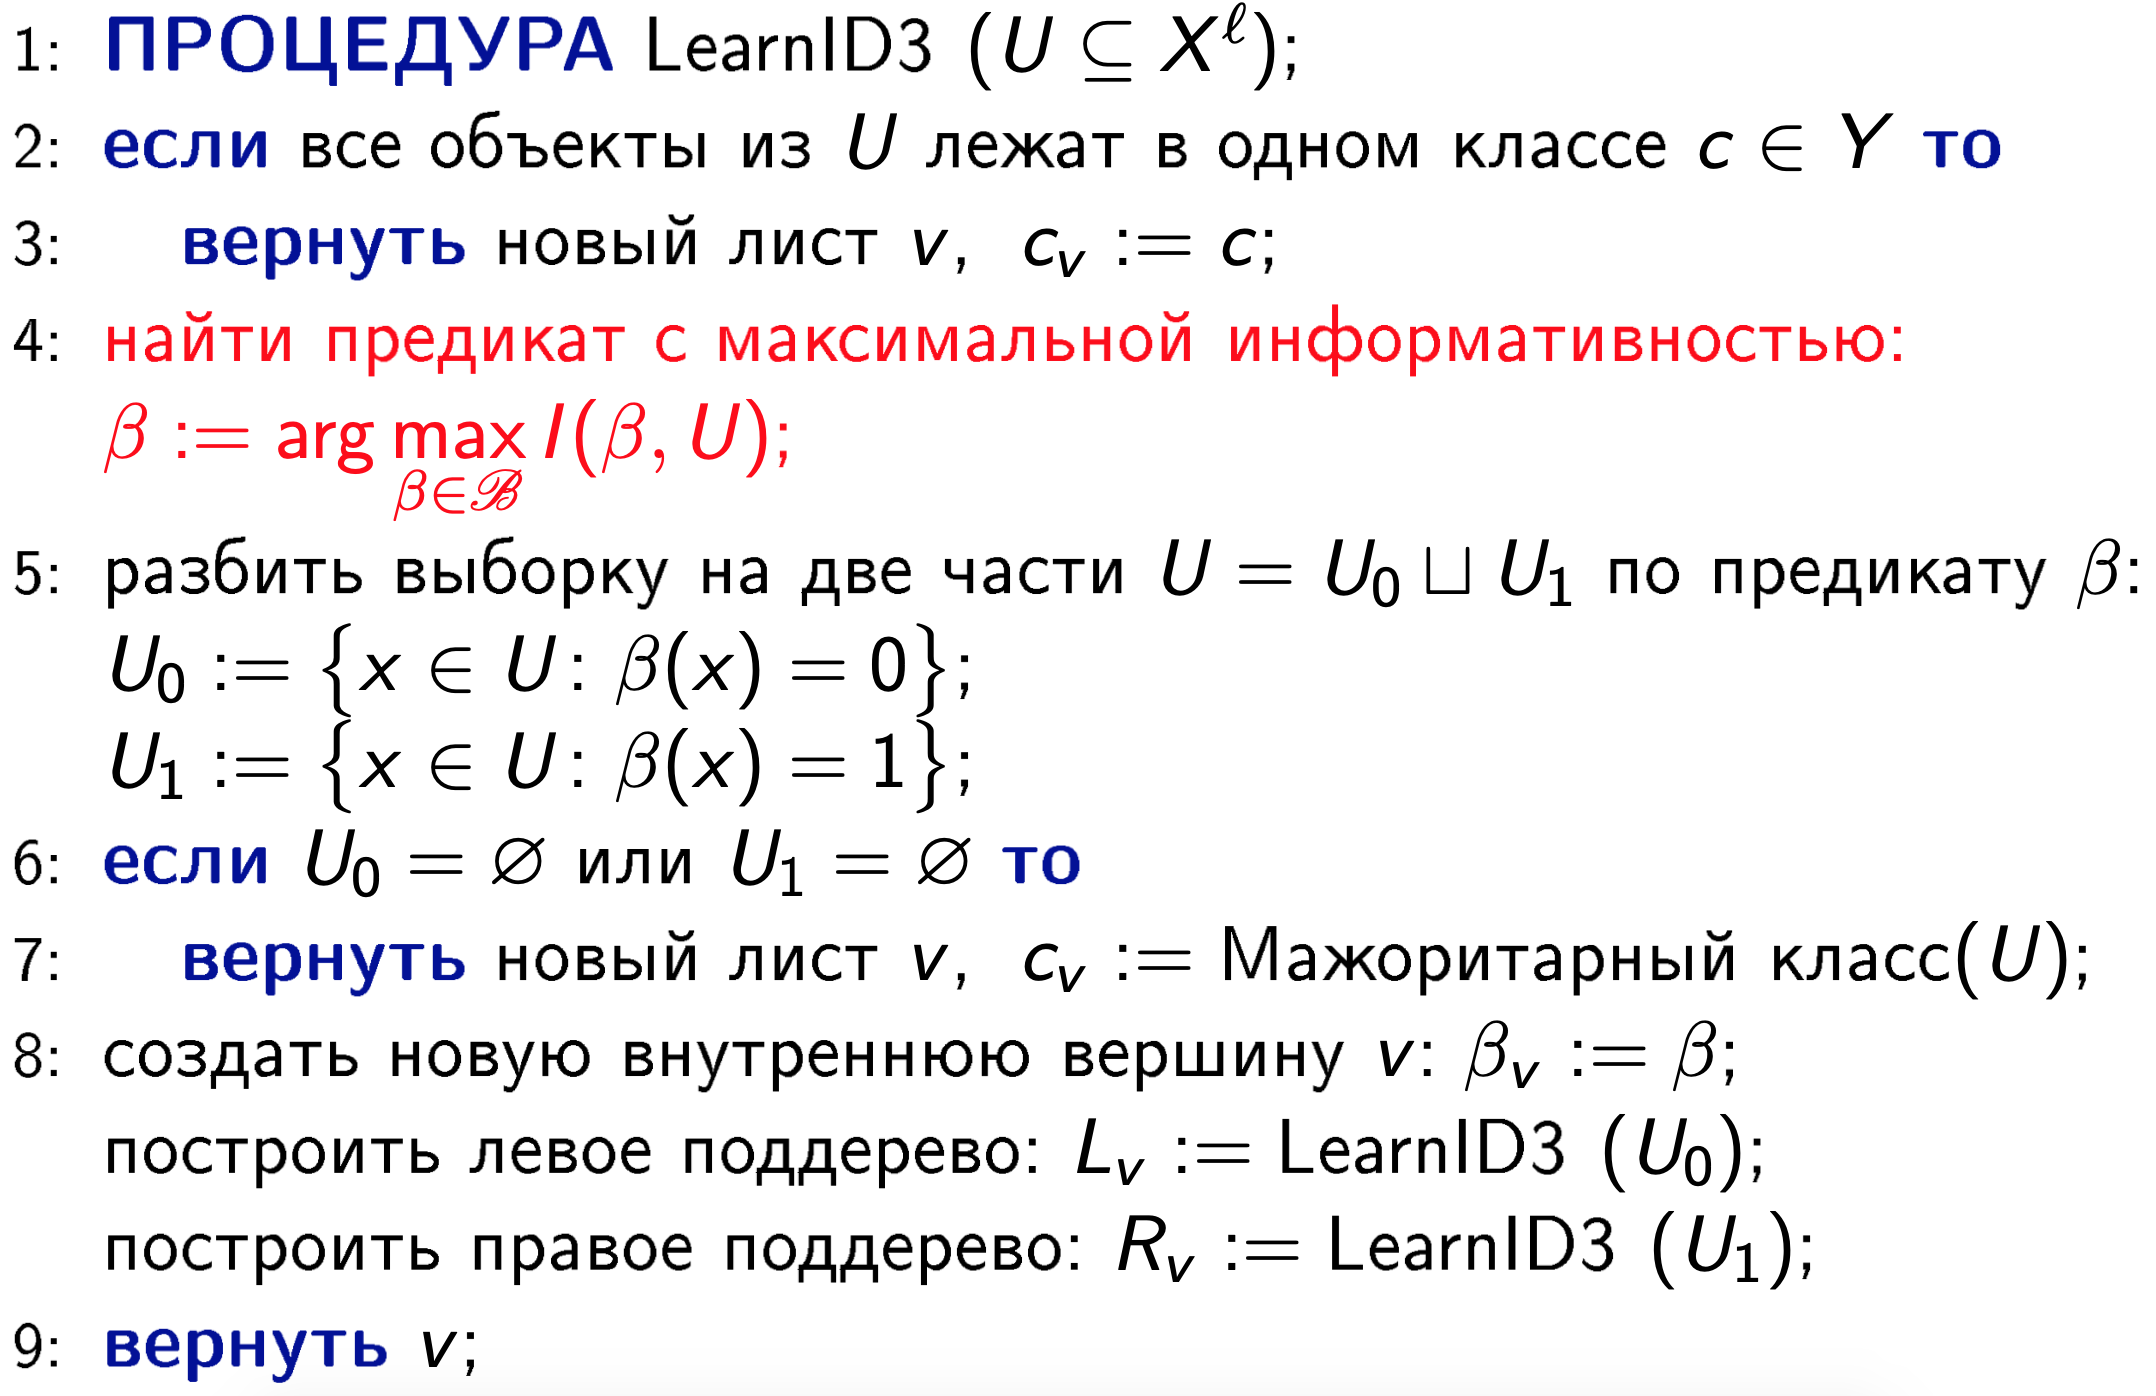

In [4]:
Image(filename='images/1.3 Решающие деревья/learn_id3.png')

ID3 — сокращенно от Induction of Decision Tree, рекурсивная процедура. Она принимает на вход некоторую подвыборку обучающей выборки. При первом вызове, на вход ей подается вся выборка.

Допустим, что на вход пришла некоторая подвыборка $U$. Давайте посмотрим на эти объекты из $U$, и если обнаружится, что все они лежат в одном классе, то образуем новую листовую вершину, запишем в нее этот класс и  вернем листовую вершину. В качестве значения будет возвращаться ссылка на поддерево. В данном случае такая ссылка — это ссылка на единственную листовую вершину, которая тоже является поддеревом в частном случае.

Дальше, четвертый шаг — самый важный в этом алгоритме. Имеется выборка объектов, в которой точно находятся объекты разных классов. Случай, когда объекты лежат в одном классе, уже обработан. Давайте попробуем найти предикат, который обладал бы максимальной информативностью, то есть максимально хорошо выделял бы из выборки $U$ объекты какого-то одного класса, или максимально хорошо отделял какую-то группу классов от всех остальных классов. На самом деле критериев информативности (обозначаются $I$) может быть очень много. Они бывают разные. В зависимости от того, какой критерий информативности используется, возникает большое разнообразие методов построения решающих деревьев. 

Допустим, что какой-то из них мы использовали, и этот критерий позволяет нам найти тот предикат, который максимально хорошо выделяет часть классов. Итак, он разбивает выборку на $2$ части: $U_0$ и $U_1$ — те объекты, которые пойдут в левую ветвь дерева и в правую ветвь дерева. Выборка разбилась на $2$ части с помощью предиката $\beta$. 

Давайте проверим, вдруг разбиений не произошло? И вдруг одна из этих подвыборок $U_0$ или $U_1$ оказалась пустой? Это означает, что несмотря на то, что в подвыборке $U$ были объекты разных классов, мы не смогли найти предикат, который их хоть как-то разделял. Это означает, что делать нечего, надо образовывать новую листовую вершину. Да, в этом листе произойдут ошибки, но тем не менее мы присвоим этому листу тот класс, объектов которого больше в обучающей подвыборке $U$. Он называется мажоритарным классом. Процедура LearnID3 вернет этот новый лист. 

Дальше мы имеем самый основной случай, когда мы нашли предикат $\beta$, который делит выборку на $2$ части. Значит, мы должны создать новую внутреннюю вершину, записать в нее этот предикат и продолжить наращивание дерева. То есть ту выборку, которая от этой вершины пошла налево (это выборка $U_0$), мы должны ее использовать для того, чтобы построить левое поддерево, и $U_1$ мы должны использовать для того, чтобы построить правое поддерево, а потом взять эти поддеревья и подклеить их к нашей вершине $v$, и тем самым построение вершины $v$ будет завершено, и мы сможем вернуть вершину $v$. 

## Варианты критериев ветвления

1) __Критерий Джини__:

$$I(\beta, X^l) = \#\{(x_i, x_j) : y_i = y_j \text{ и } \beta(x_i)=\beta(x_j)\}.$$

Он показывает, сколько есть пар объектов, лежащих в одном и том же классе, которые вместе идут либо в левую дочернюю вершину, либо в правую дочернюю вершину.

Можно придумать и противоположную стратегию, когда мы подсчитываем число пар объектов, которые лежали в разных классах, и они ушли в разные ветки.

2) __$D$-критерий В. И. Донского__:

$$I(\beta, X^l) = \#\{(x_i, x_j) : y_i \neq y_j \text{ и } \beta(x_i) \neq \beta(x_j)\}.$$

Если критерий Джини меряет то, насколько часто объекты одних классов объединяются, то критерий, предложенный Владимиром Иосифовичем Донским, меряет насколько данный предикат обладает способностью разделять объекты разных классов.

3) __Энтропийный критерий__

# Обработка пропусков. Достоинства и недостатки решающих деревьев

## Обработка пропусков

__На стадии обучения__:

- $\beta_v(x)$ не определено, тогда $x$ исключается из $U$ для $I(\beta, U)$

- $q_v = \frac{|U_0|}{|U|}$ - оценка вероятности левой ветви, $\forall v \in V_{\text{внутр}}$

- $P(y\ |\ x, v) = \frac{1}{|U|}\#\{x_i \in U : y_i = y \}$ для всех $v \in V_{\text{лист}}.$ Это условная вероятность класса $y$ для данного объекта $x$, который дошел до листовой вершины $v$. Это просто доля объектов обучающей выборки, которые дошли до этой вершины и принадлежат данному классу $y$.

__На стадии классификации__:

- $\beta_v(x)$ не определено, тогда _пропорциональное распределение_ (пропускам в левое дочернее или правое дочернее):

$$P(y\ |\ x, v) =  q_vP(y\ |\ x, L_v) + (1-q_v)P(y\ |\ x, R_v).$$

- $\beta_v(x)$ определено, тогда либо налево, либо направо:

$$P(y\ |\ x, v) =  (1-\beta_v(x))P(y\ |\ x, L_v) + \beta_v(x)P(y\ |\ x, R_v).$$

- Окончательное решение - наиболее вероятный класс:

$$a(x) = \arg\max_{y\in Y}P(y\ |\ x, v_0).$$

Объект опускается из корневой вершины в один из листьев согласно правилам, записанным в вершинах дерева. Ответ определяется на основе значения в этом листе.

## Решающие деревья ID3: достоинства и недостатки

__Достоинства__:

- Интерпретируемость и простота классификации.

- Гибкость: можно варьировать множество $\mathscr{B}.$

- Допустимы разнотипные данные и данные с пропусками.

- Трудоемкость линейна по длине выборки $O(\mathscr{B}hl).$

- Не бывает отказов от классификации.

__Недостатки__:

- Жадный ID3 переусложняет структуру дерева, и, как следствие, сильно переобучается.

- Фрагментация выборки: чем дальше от $v$ от корня, тем меньше статистическая надежность $\beta_v, c_v.$

- Высокая чувствительность к шуму, к составу выборки, к критерию информативности. 

Все эти недостатки вытекают из того, что процедура жадная.

# Способы устранения недостатков решающих деревьев

## Жадный ID3 переусложняет структуру дерева

Пример синтетической задачи классификации, которая называется "задача исключающего ИЛИ", и она не решается, например, линейным классификатором. Эта выборка не может быть разделена прямой на два класса без ошибок. 

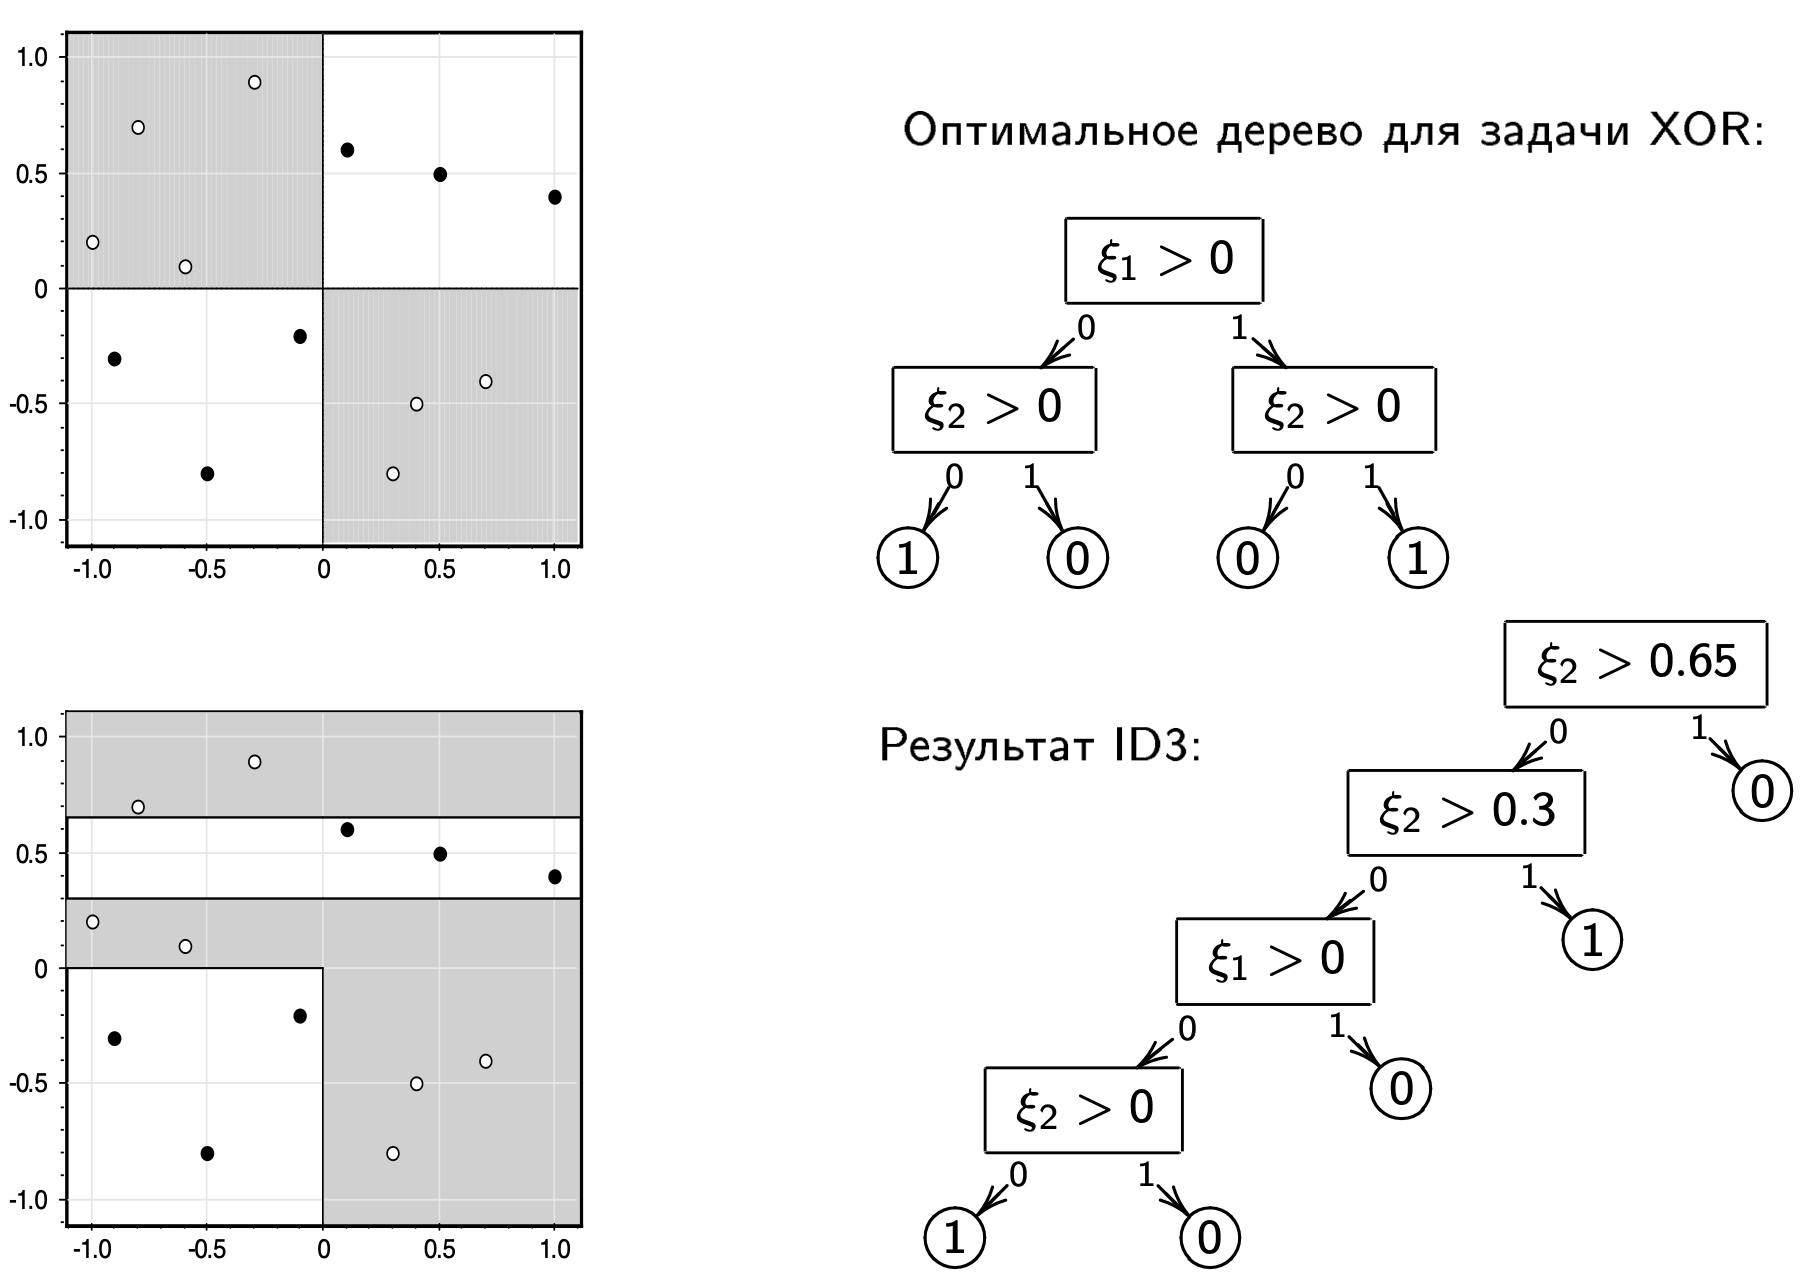

In [5]:
Image(filename='images/1.3 Решающие деревья/example_4.png')

__Как можно если не устранить эту ситуацию полностью, то хотя бы смягчить ее?__

## Усечение дерева (pruning). Алгоритм C4.5

$X^k$ - независимая контрольная выборка, $k \approx 0.5l,$ то есть контрольная примерно в два раза короче обучающей.

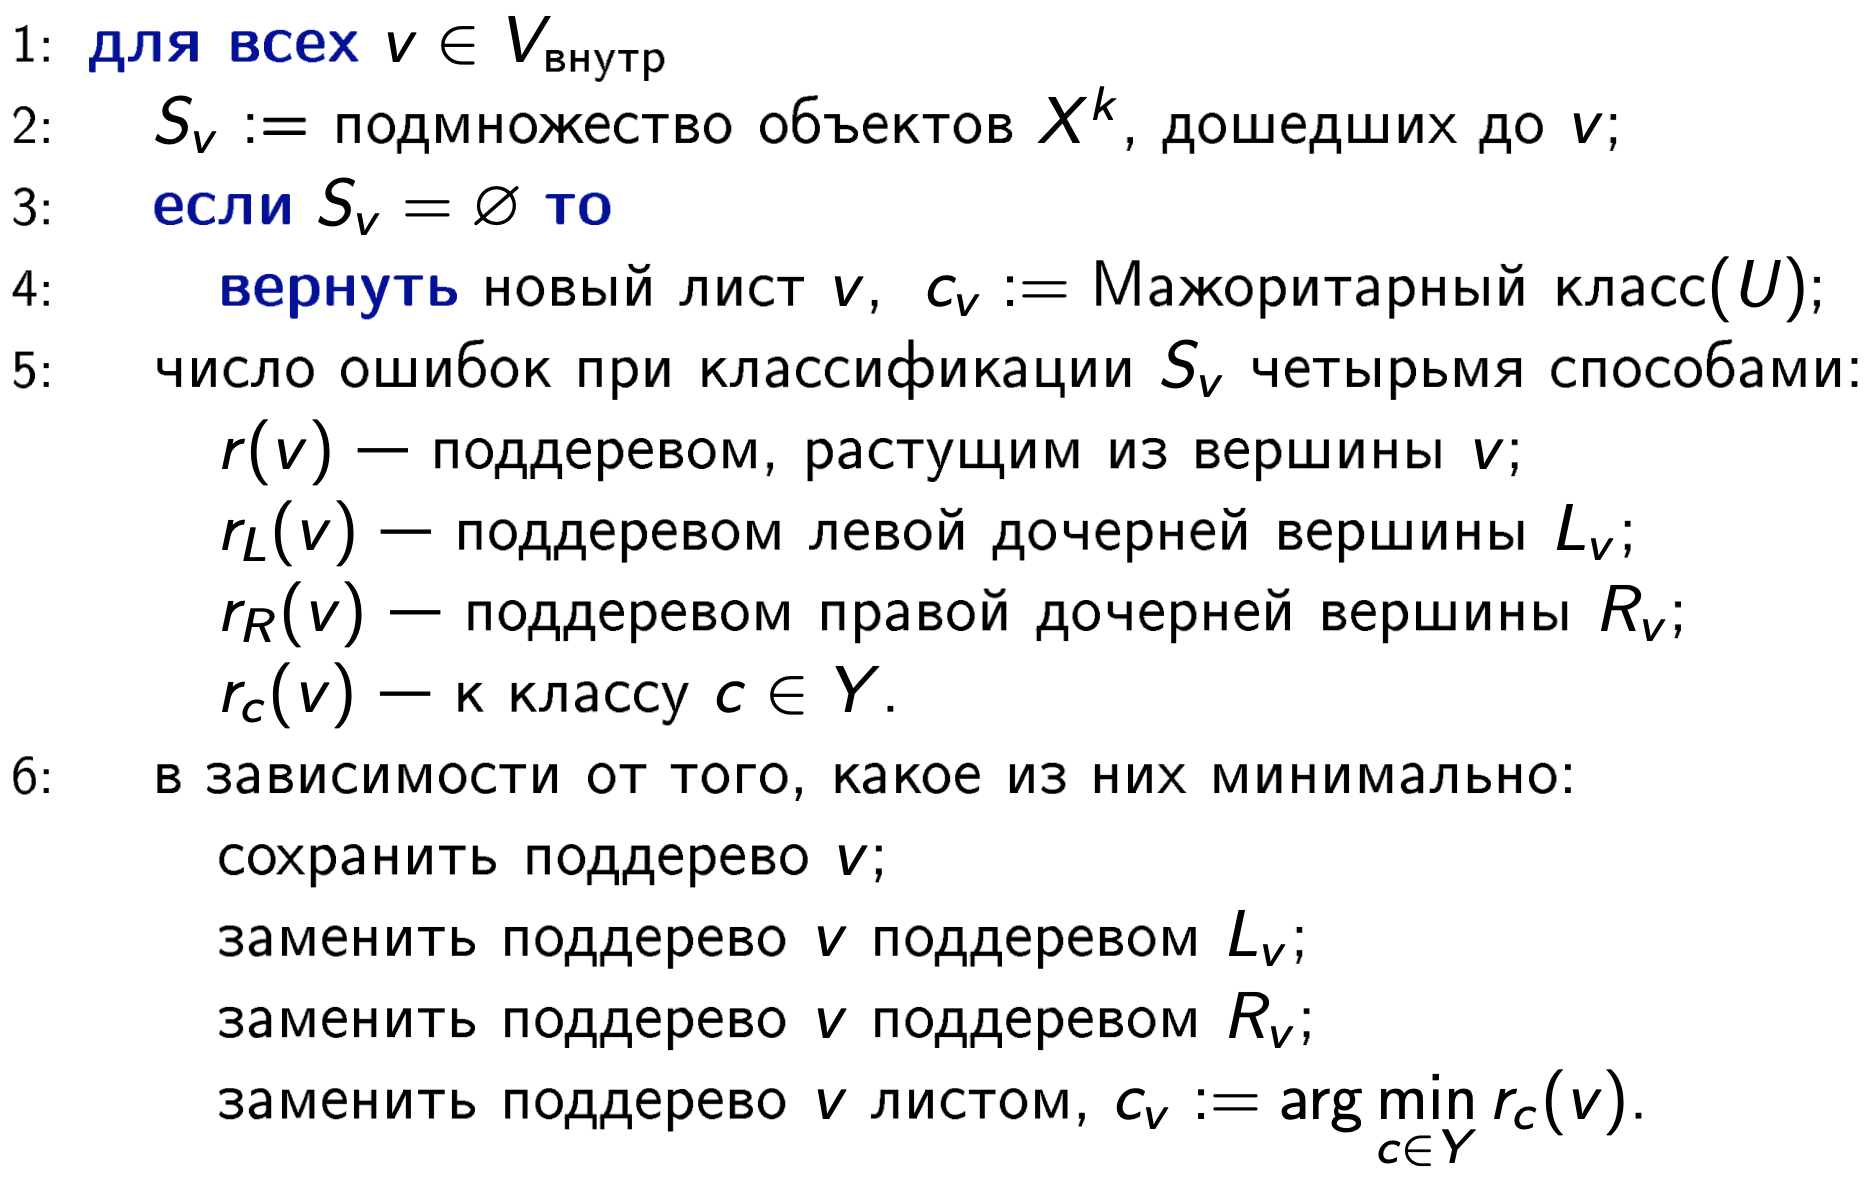

In [6]:
Image(filename='images/1.3 Решающие деревья/c_4_5.png')

__Терминальная вершина = лист.__

Алгоритм основан на следующей идее: если проблема заключается в переобучении, переусложнении структуры дерева, значит, нужна контрольная выборка данных, чтобы оценивать обобщающую способность. В этом алгоритме это делается после того, как ID3 уже построил все дерево. 

Разобьем обучающую выборку на две части: обучающая часть и контрольная. Обычно делается так, чтобы контрольная часть была вдвое короче обучающей. По первой части, с помощью ID3, строим дерево, а вторую используем для того, чтобы дерево упростить. Итак, возьмем каждый объект второй выборки, пропустим его через дерево, получим для каждой внутренней вершины подмножество объектов, которые до этой вершины дошли. И теперь для каждой внутренней вершины мы постараемся понять, нужна она или ее можно заменить терминальной вершиной, или упростить каким-то образом поддерево, которое растет из этой внутренней вершины.

Если оказалось, что множество $S_v$ (множество объектов, дошедших до данной внутренней вершины) пусто, то есть какие-то объекты обучающей выборки сюда дошли, но из контрольных объектов не дошел ни один. Тогда эту вершину упростим и заменим ее листовой вершиной, и выберем в этой листовой вершине тот класс, к которому относится большинство объектов обучающей выборки. У нас же нет объектов контрольных, которые сюда пришли, значит, пользуемся обучающими. 

Дальше мы должны принять решение, чем можно было бы заменить эту внутреннюю вершину. В алгоритме есть $4$ возможных варианта: либо мы оставляем это поддерево без изменений, либо мы заменяем поддерево вершины $v$ ее левым дочерним поддеревом, либо мы заменяем ее правым дочерним поддеревом, либо заменяем ее терминальной вершиной. 

Как выбрать один из этих четырех вариантов? Надо с помощью каждого из этих вариантов классифицировать объекты контрольной выборки, объекты множества $S_v$, и сравнить число ошибок, которое получается в каждом из этих четырех вариантов, и выбрать тот, где число ошибок меньше. 

Таким образом можно вершину за вершиной упростить дерево. Порядок просмотра всех вершин может быть разным, в зависимости от реализации этого алгоритма, можно идти сверху вниз, снизу вверх или идти по внутренним вершинам в каком-то случайном порядке, это зависит от реализации. 

## CART: деревья регрессии и классификации

Есть еще один алгоритм построения решающих деревьев - алгоритм CART, Classification and Regression Tree. Тут тоже есть очень похожий на ID3 жадный рекурсивный алгоритм построения дерева, тоже применяются стратегии усечения (или прунинга), но алгоритм обобщен на тот случай, когда решается задача регрессии. Как это сделано?

Естественно, используется другой критерий, и самое простое в этом случае и самое естественное — это использовать критерий среднеквадратичной ошибки, тот же самый, который используется в методе наименьших квадратов. Итак, пусть $U_v$ - это множество объектов обучающей выборки, дошедших до вершины $v$. Если эта вершина терминальная, то мы можем просто усреднить значение ответов во всех этих объектах, и это среднее значение будет оптимальным решением метода наименьших квадратов в этой терминальной вершине.

И точно также критерий ветвления, который используется в каждой внутренней вершине этого дерева в процессе его построения. Самый естественный способ — это взять среднеквадратичную ошибку. И тогда для предиката $\beta$, который мы собираемся использовать для ветвления, для разбиения выборки $U$ на выборку $U_0$ и $U_1$, выбор этого предиката будет осуществляться по тому, насколько хорошо будет классифицировать то дерево, которое в левом дочернем будет иметь свое среднее значение, в правом дочернем — свое среднее значение.

И так произойдет разбиение, и дальше уже процесс пойдет рекурсивно. В итоге, дерево регрессии строит кусочно-постоянную функцию, потому что в каждом листе ответ, который будет выдавать этот алгоритм, является константой — это среднее значение ответов в объектах обучающей выборки, дошедших до этой листовой вершины. Это и означает, что дерево регрессии осуществило разбиение всего пространства объектов на какие-то куски, и в каждом куске выдается свое константное значение, то есть это кусочно-постоянная функция.

__Формально__:

Обобщение на случай регрессии: $Y = \mathbb{R}, c_v \in \mathbb{R}.$

Пусть $U_v$ - множество объектов $x_i$, дошедших до вершины $v$. Значения в терминальных вершинах - МНК-решение:

$$c_v := \hat{y}(U_v) = \frac{1}{|U_v|}\sum\limits_{x_i \in U_v}y_i.$$

Критерий информативности - среднеквадратичная ошибка 

$$I(\beta, U_v) = \sum\limits_{x_i \in U_v}(\hat{y_i}(\beta) - y_i)^2,$$

где $\hat{y_i}(\beta) = \beta(x_i)\hat{y}(U_{v_1}) + (1 - \beta(x_i))\hat{y}(U_{v_0})$ - прогноз после ветвления $\beta$ и разбиения $U_v = U_{v_0} \sqcup U_{v_1}.$

__Как осуществлять оптимизацию структуры дерева в этом случае?__

## CART: критерий Minimal Cost-Complexity Pruning

Для Classification and Regression Tree придуман очень эффективный критерий, который позволяет выбрать структуру дерева, и делает это несколько не так, как в процедуре прунинга (усечения), показанной в алгоритме C4.5. Здесь можно выписать критерий, который состоит из двух частей: первая - это среднеквадратичная ошибка, которую мы и минимизируем в алгоритме CART, а вторая часть - это штрафное слагаемое. 

Это штрафное слагаемое представляет собой количество листовых вершин, домноженное на коэффициент, который называется константа регуляризации. Если увеличивать этот коэффициент, увеличивается штраф за сложность дерева, за данное количество листовых вершин, и дерево должно упроститься. То есть, при каждом значении $\alpha$ строим свое дерево, чем больше $\alpha$, тем проще дерево. 

Если будем менять коэффициент $\alpha$ (например, непрерывно увеличивать), то в таком случае получим последовательность вложенных деревьев, которая к тому же единственная, то есть она не зависит от того, как у нас пойдет процесс построения дерева. Это означает, что можно всегда выбрать константу $\alpha$ таким образом, чтобы была минимальна ошибка на тестовой выборке. И эта стратегия лежит в основе метода, который называется Minimal Cost-Complexity Pruning. Для случая классификации аналогичная стратегия может быть использована для усечения деревьев, и в таком случае используется критерий Джини.

__Формально__:

Среднеквадратичная ошибка со штрафом за сложность дерева

$$C_\alpha = \sum\limits_{i=1}^{l}(\hat{y_i} - y_i)^2 + \alpha|V_{\text{лист}}|\rightarrow \min.$$

При увеличении $\alpha$ дерево последовательно упрощается. Причем последовательность вложенных деревьев единственна.

Из этой последовательности выбирается дерево с минимальной ошибкой на тестовой выборке (Hold-Out).

Для случая классификации используется аналогичная стратегия усечения, с критерием Джини.

## Резюме

__Преимущества решающих деревьев__:

- интерпретируемость,

- допускаются разнотипные данные,

- возможность обхода пропусков;

__Недостатки решающих деревьев__:

- переобучение,

- фрагментация,

- неустойчивость к шуму, составу выборки, критерию;

__Способы устранения этих недостатков__:

- редукция,

- композиции (леса) деревьев.

# Задача

Решающие деревья относятся к классу логических методов. Их основ- ная идея состоит в объединении определенного количества простых ре- шающих правил, благодаря чему итоговый алгоритм является интер- претируемым. Как следует из названия, решающее дерево представляет собой бинарное дерево, в котором каждой вершине сопоставлено неко- торое правило вида "j-й признак имеет значение меньше b". В листьях этого дерева записаны числа-предсказания. Чтобы получить ответ, нуж- но стартовать из корня и делать переходы либо в левое, либо в правое поддерево в зависимости от того, выполняется правило из текущей вер- шины или нет.


Одна из особенностей решающих деревьев заключается в том, что они позволяют получать важности всех используемых признаков. Важность признака можно оценить на основе того, как сильно улучшился критерий качества благодаря использованию этого признака в вершинах дерева.

__Действие 1__:

Загрузите выборку из файла titanic.csv с помощью пакета Pandas.

In [1]:
import pandas
import numpy as np


data = pandas.read_csv('data/titanic.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Действие 2__:

Оставьте в выборке четыре признака: класс пассажира (Pclass), цену билета (Fare), возраст пассажира (Age) и его пол (Sex).

In [2]:
X = data[['Pclass', 'Sex', 'Age', 'Fare']]

# X.Sex = (X.Sex == 'male').map(int)
# X.loc[:, 'Sex'] = X.loc[:, 'Sex'].map(lambda x: 1 if x == 'male' else 0 )
mapping = {'male': 0, 'female': 1}
X = X.replace({'Sex': mapping})

X = X.dropna(axis=0)
X.head()

,Pclass,Sex,Age,Fare
PassengerId,,,,
1,3,0,22.0,7.2500
2,1,1,38.0,71.2833
3,3,1,26.0,7.9250
4,1,1,35.0,53.1000
5,3,0,35.0,8.0500


__Действие 3__:

Выделите целевую переменную — она записана в столбце Survived.

In [3]:
y = data['Survived']
y = y[y.index.isin(X.index)]
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

__Действие 4__:

Обучите решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию (речь идет о параметрах конструктора DecisionTreeСlassifier).

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=241, splitter='best')

__Действие 5__:

Вычислите важности признаков и найдите два признака с наибольшей важностью. Их названия будут ответами для данной задачи (в качестве ответа укажите названия признаков через запятую или пробел, порядок не важен).

In [5]:
importances = clf.feature_importances_
max_1, max_2 = 0, 0
for i in range(len(importances)):
    if importances[i] > importances[max_1]:  
        max_1, max_2 = i, max_1
    elif importances[i] > importances[max_2]:
        max_2 = i
print(importances)
print(max_1, max_2)
columns = [X.columns[i] for i in [max_2, max_1]]
print(*columns)
with open('answers/1_3_ans_1.txt', 'w') as f:
    f.write(columns[0] + ' ' + columns[1])

[0.14751816 0.30051221 0.25124241 0.30072722]
3 1
Sex Fare


## Способ изображения решающего дерева

In [29]:
from sklearn import tree
with open('decision_tree/tree.dot', 'w') as dotfile:
    dotfile=tree.export_graphviz(clf, out_file=dotfile)

In [30]:
import pydot

(graph,) = pydot.graph_from_dot_file('decision_tree/tree.dot')
graph.write_png('decision_tree/tree.png')

In [31]:
from graphviz import render
render('dot', 'png', 'decision_tree/tree.dot')

'decision_tree/tree.dot.png'

__Чтобы сразу в ноутбуке__

In [2]:
from graphviz import Source
Source.from_file("decision_tree/tree.dot")